# Data Cleaning

In [1]:
import os
import pandas as pd
from datetime import datetime
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
#brands
brands = pd.read_json('brands.json', lines=True)

In [3]:
brands.columns

Index(['_id', 'barcode', 'category', 'categoryCode', 'cpg', 'name', 'topBrand',
       'brandCode'],
      dtype='object')

In [4]:
brands['_id'] = brands['_id'].apply(lambda x: list(x.values())[0])

In [5]:
brands['barcode'] = brands['barcode'].astype(str)
brands = brands.rename(columns={'_id':'BrandId'})

In [6]:
brands.head()

,BrandId,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [7]:
cpg = brands[['BrandId','cpg']].copy()

In [8]:
cpg['oid'] = None 
cpg['ref'] = None 
for i in range(len(brands['cpg'])):
    if len(list(brands['cpg'][i].values())[0]) != 4:
        cpg['oid'][i] = list(cpg['cpg'][i].values())[0]
        cpg['ref'][i] = list(cpg['cpg'][i].values())[1]
    else:
        cpg['ref'][i] = list(cpg['cpg'][i].values())[0]
        cpg['oid'][i] = list(cpg['cpg'][i].values())[1]
    cpg['oid'][i] = list(cpg['oid'][i].values())[0]
cpg = cpg[['BrandId','oid','ref']]
brands = pd.merge(brands, cpg, how = 'left', on='BrandId')

In [9]:
brands = brands.drop(['cpg'],axis = 1)

In [10]:
# receipts 
receipts = pd.read_json('receipts.json', lines=True)
receipts['_id'] = receipts['_id'].apply(lambda x: list(x.values())[0])

In [11]:
receipts.columns

Index(['_id', 'bonusPointsEarned', 'bonusPointsEarnedReason', 'createDate',
       'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate',
       'pointsEarned', 'purchaseDate', 'purchasedItemCount',
       'rewardsReceiptItemList', 'rewardsReceiptStatus', 'totalSpent',
       'userId'],
      dtype='object')

In [12]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [13]:
def date_convert(d):
    if type(d) == float:
        pass
    else:
        return(pd.to_datetime(list(d.values())[0], unit='ms'))

In [14]:
receipts['createDate'] = receipts['createDate'].apply(lambda x: date_convert(x))
receipts['dateScanned'] = receipts['dateScanned'].apply(lambda x: date_convert(x))
receipts['finishedDate'] = receipts['finishedDate'].apply(lambda x: date_convert(x))
receipts['modifyDate'] = receipts['modifyDate'].apply(lambda x: date_convert(x))
receipts['pointsAwardedDate'] = receipts['pointsAwardedDate'].apply(lambda x: date_convert(x))
receipts['purchaseDate'] = receipts['purchaseDate'].apply(lambda x: date_convert(x))
receipts = receipts.rename(columns={'_id':'ReceiptId'})

In [15]:
receipts.head()

,ReceiptId,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [16]:
rrit = receipts[['ReceiptId','rewardsReceiptItemList']].copy()

In [17]:
rrit.head()

,ReceiptId,rewardsReceiptItemList
0,5ff1e1eb0a720f0523000575,"[{'barcode': '4011', 'description': 'ITEM NOT ..."
1,5ff1e1bb0a720f052300056b,"[{'barcode': '4011', 'description': 'ITEM NOT ..."
2,5ff1e1f10a720f052300057a,"[{'needsFetchReview': False, 'partnerItemId': ..."
3,5ff1e1ee0a7214ada100056f,"[{'barcode': '4011', 'description': 'ITEM NOT ..."
4,5ff1e1d20a7214ada1000561,"[{'barcode': '4011', 'description': 'ITEM NOT ..."


In [21]:
item_df = pd.DataFrame()

In [24]:
item_df['ReceiptId'] = None

In [18]:
rrit.columns

Index(['ReceiptId', 'rewardsReceiptItemList'], dtype='object')

In [20]:
rrit['rewardsReceiptItemList'][0]

0       [{'barcode': '4011', 'description': 'ITEM NOT ...
1       [{'barcode': '4011', 'description': 'ITEM NOT ...
2       [{'needsFetchReview': False, 'partnerItemId': ...
3       [{'barcode': '4011', 'description': 'ITEM NOT ...
4       [{'barcode': '4011', 'description': 'ITEM NOT ...
                              ...                        
1114    [{'barcode': 'B076FJ92M4', 'description': 'mue...
1115                                                  NaN
1116                                                  NaN
1117    [{'barcode': 'B076FJ92M4', 'description': 'mue...
1118                                                  NaN
Name: rewardsReceiptItemList, Length: 1119, dtype: object

In [30]:
item_list = []
col_list = []

In [31]:
for i in range(len(rrit['rewardsReceiptItemList'])):
    if type(rrit['rewardsReceiptItemList'][i]) == list: 
        for d in rrit['rewardsReceiptItemList'][i]:
            for key in d:
                if key not in col_list:
                    col_list.append(key)
            item_list.append(d)
            item_list[-1]['ReceiptId'] = rrit['ReceiptId'][i]

In [53]:
col_list

['barcode',
 'description',
 'finalPrice',
 'itemPrice',
 'needsFetchReview',
 'partnerItemId',
 'preventTargetGapPoints',
 'quantityPurchased',
 'userFlaggedBarcode',
 'userFlaggedNewItem',
 'userFlaggedPrice',
 'userFlaggedQuantity',
 'needsFetchReviewReason',
 'pointsNotAwardedReason',
 'pointsPayerId',
 'rewardsGroup',
 'rewardsProductPartnerId',
 'userFlaggedDescription',
 'originalMetaBriteBarcode',
 'originalMetaBriteDescription',
 'brandCode',
 'competitorRewardsGroup',
 'discountedItemPrice',
 'originalReceiptItemText',
 'itemNumber',
 'originalMetaBriteQuantityPurchased',
 'pointsEarned',
 'targetPrice',
 'competitiveProduct',
 'originalFinalPrice',
 'originalMetaBriteItemPrice',
 'deleted',
 'priceAfterCoupon',
 'metabriteCampaignId',
 'ReceiptId']

In [37]:
col_list.append('ReceiptId')

In [38]:
item_df = pd.DataFrame(columns = col_list)

In [42]:
temp

{'barcode': 'B07BRRLSVC',
 'description': 'thindust summer face mask - sun protection neck gaiter for outdooractivities',
 'finalPrice': '11.99',
 'itemPrice': '11.99',
 'needsFetchReview': None,
 'partnerItemId': '1',
 'preventTargetGapPoints': None,
 'quantityPurchased': 1,
 'userFlaggedBarcode': None,
 'userFlaggedNewItem': None,
 'userFlaggedPrice': None,
 'userFlaggedQuantity': None,
 'needsFetchReviewReason': None,
 'pointsNotAwardedReason': None,
 'pointsPayerId': None,
 'rewardsGroup': None,
 'rewardsProductPartnerId': None,
 'userFlaggedDescription': None,
 'originalMetaBriteBarcode': None,
 'originalMetaBriteDescription': None,
 'brandCode': None,
 'competitorRewardsGroup': None,
 'discountedItemPrice': '11.99',
 'originalReceiptItemText': 'thindust summer face mask - sun protection neck gaiter for outdooractivities',
 'itemNumber': None,
 'originalMetaBriteQuantityPurchased': None,
 'pointsEarned': None,
 'targetPrice': None,
 'competitiveProduct': None,
 'originalFinalPrice

In [45]:
for d in item_list:
    temp = {}
    for key in col_list:
        temp[key] = None
    for key in d:
        temp[key] = d[key]
    item_df = item_df.append(temp, ignore_index= True)

In [47]:
item_df.head()

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId,ReceiptId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5,4011,True,...,None,None,None,None,None,None,None,None,None,5ff1e1eb0a720f0523000575
1,4011,ITEM NOT FOUND,1,1,None,1,None,1,None,None,...,None,None,None,None,None,None,None,None,None,5ff1e1bb0a720f052300056b
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1,028400642255,True,...,None,None,None,None,None,None,None,None,None,5ff1e1bb0a720f052300056b
3,None,None,None,None,False,1,True,None,4011,True,...,None,None,None,None,None,None,None,None,None,5ff1e1f10a720f052300057a
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4,4011,True,...,None,None,None,None,None,None,None,None,None,5ff1e1ee0a7214ada100056f


In [ ]:
rrit.head()

In [ ]:
#rrit[rrit['brandCode'].isna()]['brandCode']

In [ ]:
#rrit = rrit.drop(['rewardsReceiptItemList'], axis = 1)

In [49]:
receipts = receipts.drop(['rewardsReceiptItemList'], axis = 1)
#receipts = pd.merge(receipts, rrit, how = 'left', on = 'ReceiptId')

In [50]:
# users 
users = pd.read_json('users.json', lines=True)
users['_id'] = users['_id'].apply(lambda x: list(x.values())[0])
users['createdDate'] = users['createdDate'].apply(lambda x: date_convert(x))
users['lastLogin'] = users['lastLogin'].apply(lambda x: date_convert(x))
users = users.rename(columns = {'_id':'userId'}) 

In [ ]:
brands.columns

In [ ]:
receipts.columns 

In [ ]:
receipts.head()

In [ ]:
users.columns

In [ ]:
len(users)

In [ ]:
type(users['userId'][0])

In [52]:
brands.to_csv('brands.csv',encoding='utf-8')
users.to_csv('users.csv',encoding='utf-8')
receipts.to_csv('receipts.csv',encoding='utf-8')
item_df.to_csv('items.csv',encoding='utf-8')

# Data Quality Issue

1. Check Duplicated rows 

In [54]:
print('duplicate rows in receipts:\n',
      receipts.duplicated().value_counts(),'\n') # no duplicates in receipts

print('duplicate rows in users:\n',
      users.duplicated().value_counts(),'\n') # 283 rows in users are duplicated

print('duplicate rows in brands:\n',
      brands.duplicated().value_counts(),'\n') # no duplicates in brands

duplicate rows in receipts:
 False    1119
dtype: int64 

duplicate rows in users:
 True     283
False    212
dtype: int64 

duplicate rows in brands:
 False    1167
dtype: int64 



2. Check missing value

In [55]:
print ('receipts dataset ({} rows) \n null value of each variable:\n'.format(receipts.shape[0]),
       '\n',receipts.isnull().sum(),'\n')
print('-------------------')

print ('users dataset ({} rows) \n null value of each variable:\n'.format(users.shape[0]),
       '\n',users.isnull().sum(),'\n')
print('-------------------')

print ('brands dataset ({} rows) \n null value of each variable:\n'.format(brands.shape[0]),
       '\n',brands.isnull().sum(),'\n')
print('-------------------')

receipts dataset (1119 rows) 
 null value of each variable:
 
 ReceiptId                    0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64 

-------------------
users dataset (495 rows) 
 null value of each variable:
 
 userId           0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64 

-------------------
brands dataset (1167 rows) 
 null value of each variable:
 
 BrandId           0
barcode           0
category        155
categoryCode    650
name              0
topBrand        612
brandCode       234
oid               0
ref               0


3. Check Outliers 

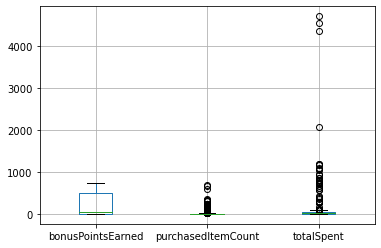

In [56]:
boxplot_r = receipts.boxplot(column=['bonusPointsEarned', 'purchasedItemCount','totalSpent'])

4. The barcode does not have a uniform type 

In [59]:
item_df['barcode']

0               4011
1               4011
2       028400642255
3               None
4               4011
            ...     
6936      B07BRRLSVC
6937      B076FJ92M4
6938      B07BRRLSVC
6939      B076FJ92M4
6940      B07BRRLSVC
Name: barcode, Length: 6941, dtype: object

In [60]:
brands['barcode']

0       511111019862
1       511111519928
2       511111819905
3       511111519874
4       511111319917
            ...     
1162    511111116752
1163    511111706328
1164    511111416173
1165    511111400608
1166    511111019930
Name: barcode, Length: 1167, dtype: object

In [62]:
b = pd.merge(left = item_df, right = brands,how = 'inner', on = ['barcode'])
print('There are only %s rows in merged data set.' %len(b))

There are 89 rows in merged data set.
